# Home Mortgage Approval Ada Boost

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import RandomOverSampler

plt.rcParams["font.size"] =14

In [18]:
df = pd.read_csv("./Data/actions_taken_1-2-3_state_TN.csv")
df['income'] = df['income'].multiply(1000)

/var/folders/8v/8twy7p3n3m535t9m_htmk0h00000gn/T/ipykernel_9349/3743522934.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Data/actions_taken_1-2-3_state_TN.csv")


In [19]:
needed_cols = ["action_taken", "purchaser_type", "preapproval", "loan_type", "loan_purpose",
               "business_or_commercial_purpose", "loan_amount", "loan_to_value_ratio", "interest_rate", "hoepa_status", 
               "property_value", "occupancy_type", "income", "debt_to_income_ratio", 
               "applicant_credit_score_type"]
 
modified_df = df[needed_cols]
modified_df = modified_df.dropna()
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205118 entries, 1203 to 282624
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   action_taken                    205118 non-null  int64  
 1   purchaser_type                  205118 non-null  int64  
 2   preapproval                     205118 non-null  int64  
 3   loan_type                       205118 non-null  int64  
 4   loan_purpose                    205118 non-null  int64  
 5   business_or_commercial_purpose  205118 non-null  int64  
 6   loan_amount                     205118 non-null  float64
 7   loan_to_value_ratio             205118 non-null  object 
 8   interest_rate                   205118 non-null  object 
 9   hoepa_status                    205118 non-null  int64  
 10  property_value                  205118 non-null  object 
 11  occupancy_type                  205118 non-null  int64  
 12  income            

In [20]:
modified_df['loan_to_value_ratio'] = modified_df['loan_to_value_ratio'].replace('Exempt', 8888)
modified_df['interest_rate'] = modified_df['interest_rate'].replace('Exempt', 8888)
modified_df['property_value'] = modified_df['property_value'].replace('Exempt', 8888)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('Exempt', 8888)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('20%-<30%', 25)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('30%-<36%', 33)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('<20%', 15)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('50%-60%', 55)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('>60%', 65)

In [21]:
modified_df['loan_to_value_ratio'] = modified_df['loan_to_value_ratio'].astype(float)
modified_df['interest_rate'] = modified_df['interest_rate'].astype(float)
modified_df['property_value'] = modified_df['property_value'].astype(float)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].astype(float)

In [22]:
modified_df['action_taken'] = modified_df['action_taken'].replace([1,2,3], [1,1,0])

In [23]:
modified_df = modified_df.reset_index(drop=True)
modified_df.head()

,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,hoepa_status,property_value,occupancy_type,income,debt_to_income_ratio,applicant_credit_score_type
0,1,71,2,1,1,2,405000.0,80.0,7.125,2,505000.0,3,116000.0,42.0,1
1,1,71,2,2,1,2,155000.0,96.5,3.500,2,165000.0,1,67000.0,43.0,1
2,1,1,2,1,1,2,175000.0,68.0,4.875,2,255000.0,1,66000.0,33.0,2
3,1,1,2,1,1,2,475000.0,80.0,4.625,2,595000.0,1,214000.0,15.0,9
4,1,71,2,2,1,2,335000.0,96.5,3.875,2,335000.0,1,84000.0,44.0,3


In [24]:
features = ["purchaser_type", "preapproval", "loan_type", "loan_purpose",
               "business_or_commercial_purpose", "loan_amount", "loan_to_value_ratio", "interest_rate", "hoepa_status", 
               "property_value", "occupancy_type", "income", "debt_to_income_ratio", 
               "applicant_credit_score_type"]
X = modified_df[features]
y = np.array(modified_df['action_taken'])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [26]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [11]:
X_subtrain_res, X_val_res, y_subtrain_res, y_val_res = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.125)

In [12]:
estimators = [50, 100, 150, 200, 250]
for es in estimators:
    clf = AdaBoostClassifier(n_estimators=es)
    clf.fit(X_subtrain_res, y_subtrain_res)
    y_pred_train = clf.predict(X_subtrain_res)
    y_pred_test = clf.predict(X_val_res)
    ac_score_train = accuracy_score(y_subtrain_res, y_pred_train)
    ac_score_test = accuracy_score(y_val_res, y_pred_test)
    print(es, ac_score_train, ac_score_test)

50 0.9932845979682322 0.993239105406266
100 0.9933685842364773 0.9933125933909805
150 0.9934875647831579 0.9933370893858854
200 0.993634540752587 0.9934840653553144
250 0.9936870321702401 0.9935575533400289


In [27]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit(X_resampled, y_resampled)
y_predict_train = clf.predict(X_resampled)
y_predict = clf.predict(X_test)
print(accuracy_score(y_resampled, y_predict_train))
print(accuracy_score(y_test, y_predict))

0.9933003453935282
0.9880313962558502


In [28]:
print(f1_score(y_test, y_predict))

0.9939470148057744


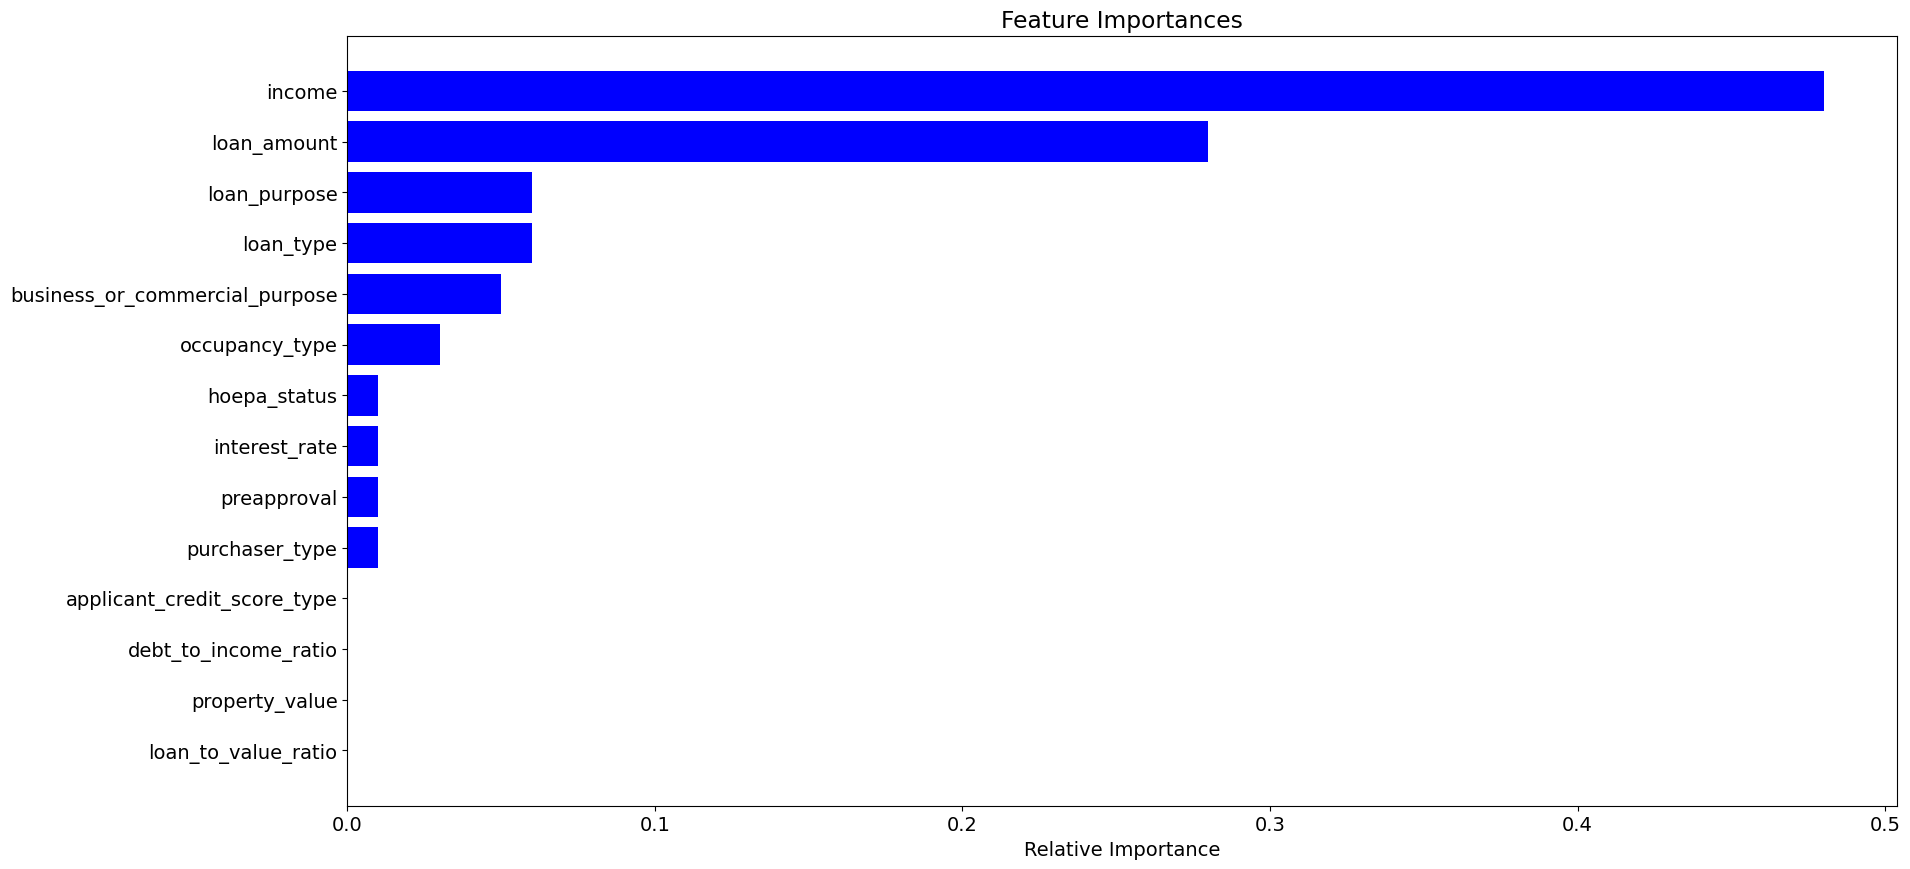

In [29]:
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

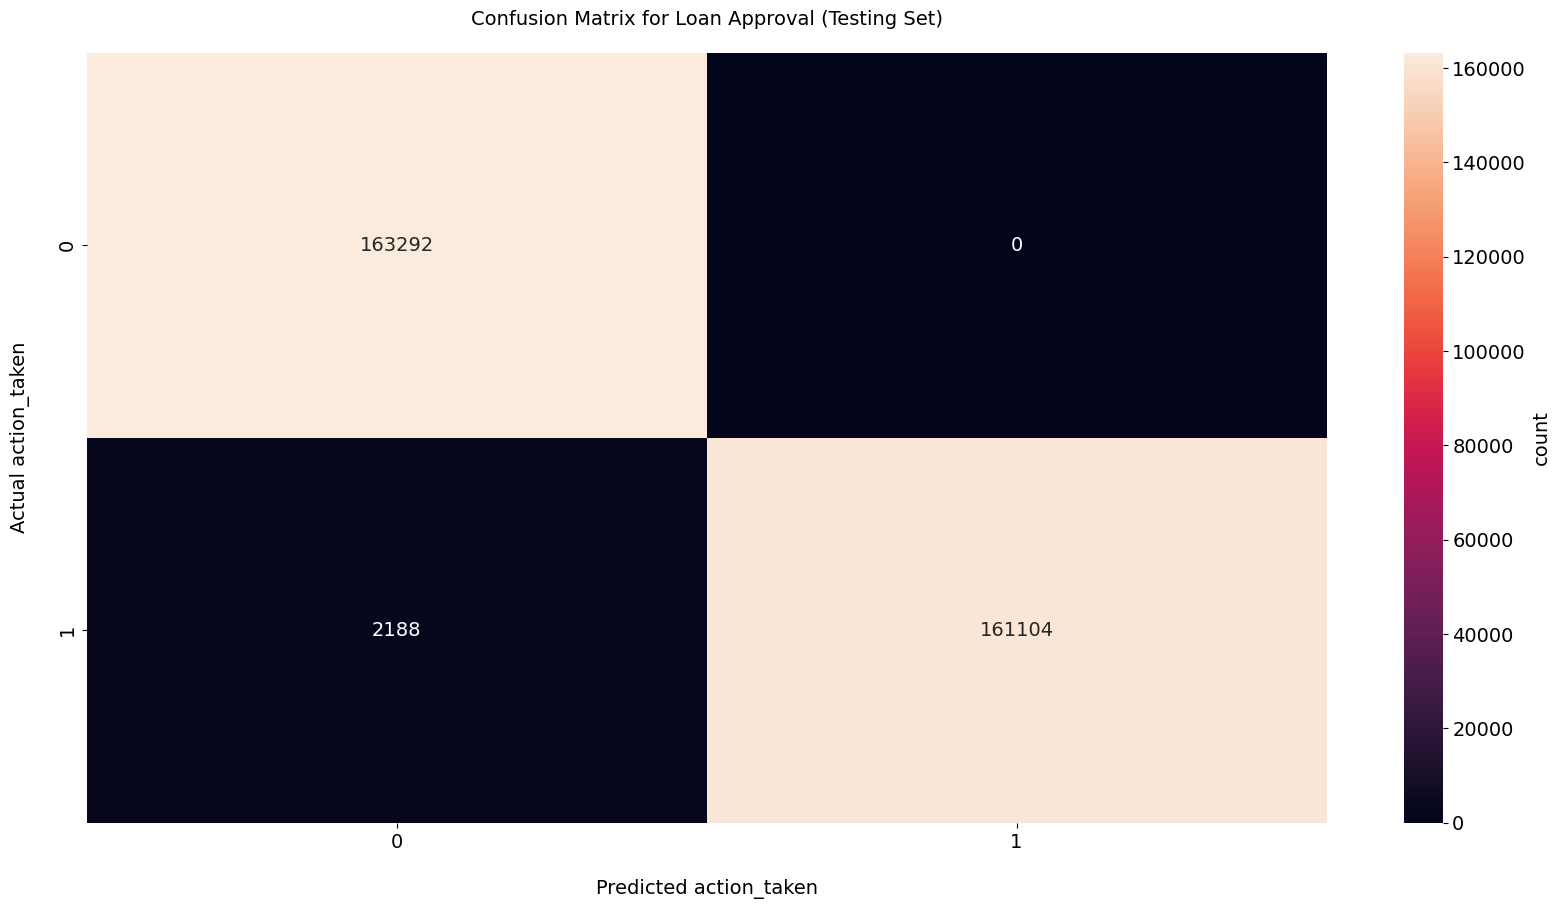

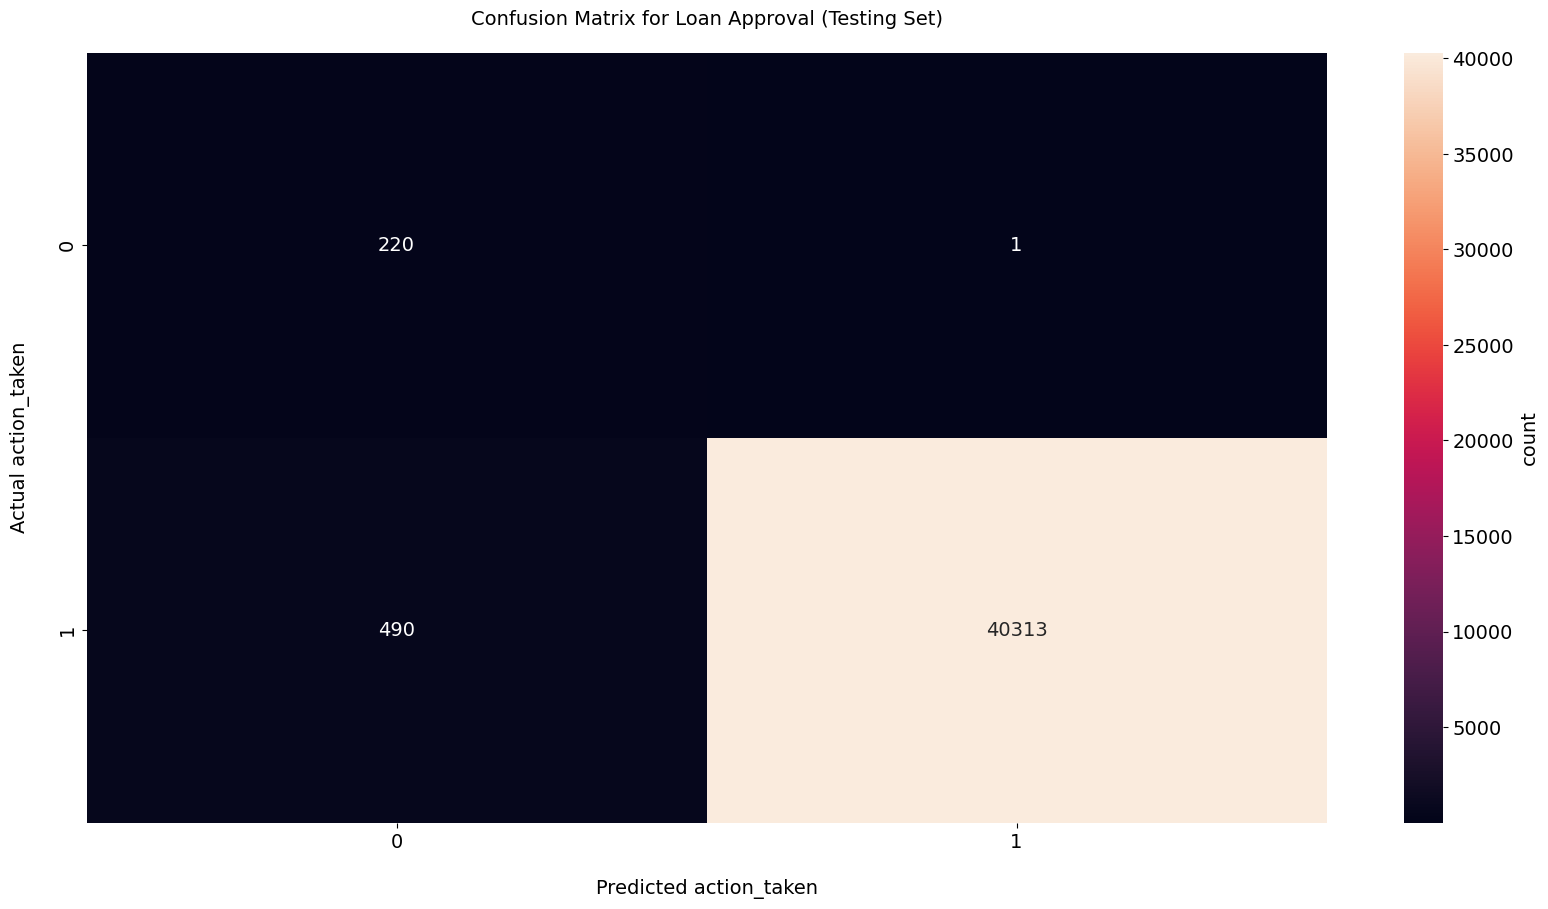

In [31]:
cm_train = confusion_matrix(y_resampled, y_predict_train)
plt.figure(figsize=(20,10))
ax = sns.heatmap(cm_train, annot=True, fmt='d', cbar_kws={'label': 'count'})
ax.set_xlabel("Predicted action_taken", labelpad=20)
ax.xaxis.set_ticklabels([0,1])
ax.set_ylabel("Actual action_taken", labelpad=20)
ax.yaxis.set_ticklabels([0,1])
ax.set_title("Confusion Matrix for Loan Approval (Testing Set)", fontsize=14, pad=20)
plt.show()

cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(20,10))
ax = sns.heatmap(cm, annot=True, fmt='d', cbar_kws={'label': 'count'})
ax.set_xlabel("Predicted action_taken", labelpad=20)
ax.xaxis.set_ticklabels([0,1])
ax.set_ylabel("Actual action_taken", labelpad=20)
ax.yaxis.set_ticklabels([0,1])
ax.set_title("Confusion Matrix for Loan Approval (Testing Set)", fontsize=14, pad=20)
plt.show()